## Importing

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_column", None)
pd.set_option("display.max_rows", None)

## Information
* Car Name: The name or model of the car.
* Distance: The distance already travelled by the car (in kilometres).
* Year Bought: The year when the car was purchased.
* Previous Owners: The number of previous owners of the car.
* Location: The location of the Regional Transport Office (RTO).
* Transmission: The type of transmission (automatic or manual).
* Car Type: The type of car (sedan, SUV, hatchback, luxury SUV, luxury sedan).
* Fuel: The fuel used (petrol, diesel, CNG, etc.).
* Price: The price of the car (Indian Rupee)

In [7]:
df = pd.read_csv("cars_24_combined.csv")
df.drop(["Unnamed: 0","Location","Owner"], axis = 1, inplace = True)
df = df.dropna(axis=0)
df.head()

,Car Name,Year,Distance,Fuel,Drive,Type,Price
0,Maruti S PRESSO,2022.0,3878,PETROL,Manual,HatchBack,514000
1,Hyundai Xcent,2018.0,32041,PETROL,Manual,Sedan,674000
2,Tata Safari,2021.0,96339,DIESEL,Automatic,SUV,1952000
3,Maruti Vitara Brezza,2019.0,51718,DIESEL,Manual,SUV,690000
4,Tata Tiago,2021.0,19811,PETROL,Manual,HatchBack,526000


In [8]:
def get_info(dataframe):
    print(45*"#", "TOP 5 OBSERVATIONS OF THE DATASET ", 45*"#", dataframe.head(), 
          sep='\n', end = '\n\n')
    print(45*"#", f"TOTAL NUMBER OF OBSERVATIONS : {dataframe.shape[0]}", 45*"#", 
          sep='\n', end = '\n\n')
    print(45*"#", f"NUMBER OF VARIABLES: {dataframe.shape[1]}", 45*"#", 
          sep='\n', end = '\n\n')
    print(45*"#", "TOTAL MISSING VALUES FOR EACH VARIABLE", 45*"#", dataframe.isnull().sum(), 
          sep='\n', end = '\n\n')
    print(45*"#", "TYPES OF VARIABLES", 45*"#", dataframe.dtypes, 
          sep='\n', end = '\n\n')
    print(45*"#", "DESCRIPTIVE STATISTICS OF NUMERICAL VARIABLES", 45*"#", dataframe.describe().T, 
          sep='\n', end = '\n\n')
    print(45*"#", "DESCRIPTIVE STATISTICS OF CATEGORY VARIABLES", 45*"#", dataframe.describe(include=object).T, 
          sep='\n', end = '\n\n')
get_info(df)

#############################################
TOP 5 OBSERVATIONS OF THE DATASET 
#############################################
               Car Name    Year  Distance    Fuel      Drive       Type  \
0       Maruti S PRESSO  2022.0      3878  PETROL     Manual  HatchBack   
1         Hyundai Xcent  2018.0     32041  PETROL     Manual      Sedan   
2           Tata Safari  2021.0     96339  DIESEL  Automatic        SUV   
3  Maruti Vitara Brezza  2019.0     51718  DIESEL     Manual        SUV   
4            Tata Tiago  2021.0     19811  PETROL     Manual  HatchBack   

     Price  
0   514000  
1   674000  
2  1952000  
3   690000  
4   526000  

#############################################
TOTAL NUMBER OF OBSERVATIONS : 8014
#############################################

#############################################
NUMBER OF VARIABLES: 7
#############################################

#############################################
TOTAL MISSING VALUES FOR EACH VARIABLE
#############

## Create Feature

In [11]:
# Splitting Car names to 2 features
df[["Brand","Model"]] = df["Car Name"].str.split(" ",1, expand = True)
# Check the new DataFrame
df.head()

,Car Name,Year,Distance,Fuel,Drive,Type,Price,Brand,Model
0,Maruti S PRESSO,2022.0,3878,PETROL,Manual,HatchBack,514000,Maruti,S PRESSO
1,Hyundai Xcent,2018.0,32041,PETROL,Manual,Sedan,674000,Hyundai,Xcent
2,Tata Safari,2021.0,96339,DIESEL,Automatic,SUV,1952000,Tata,Safari
3,Maruti Vitara Brezza,2019.0,51718,DIESEL,Manual,SUV,690000,Maruti,Vitara Brezza
4,Tata Tiago,2021.0,19811,PETROL,Manual,HatchBack,526000,Tata,Tiago


## Visualization

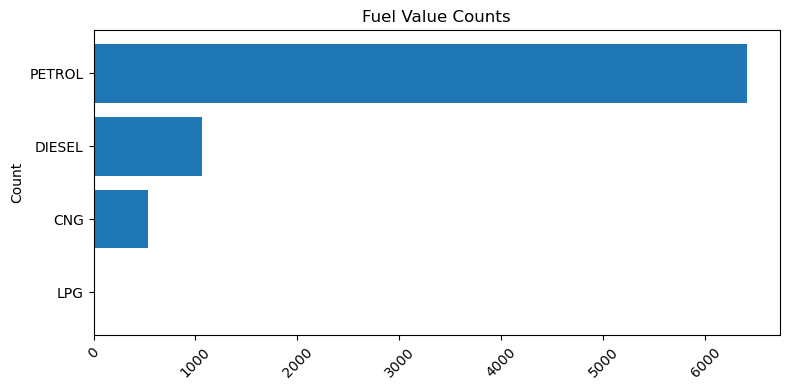

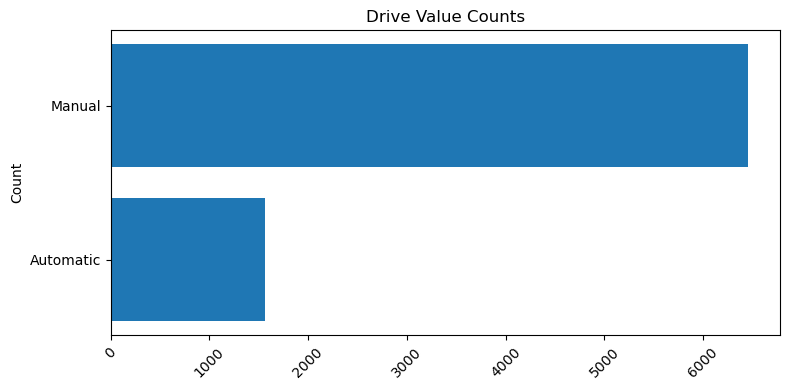

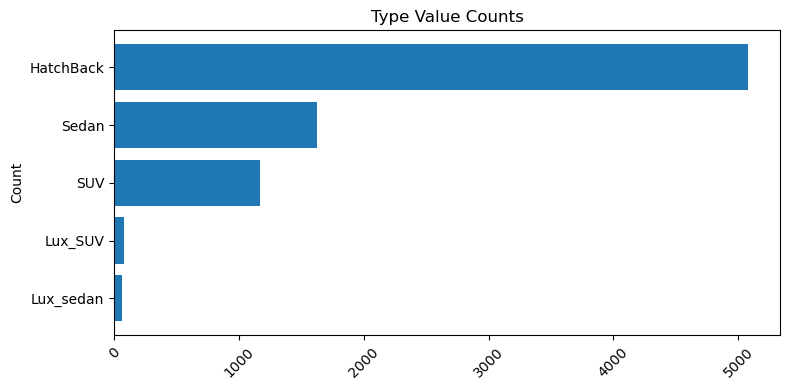

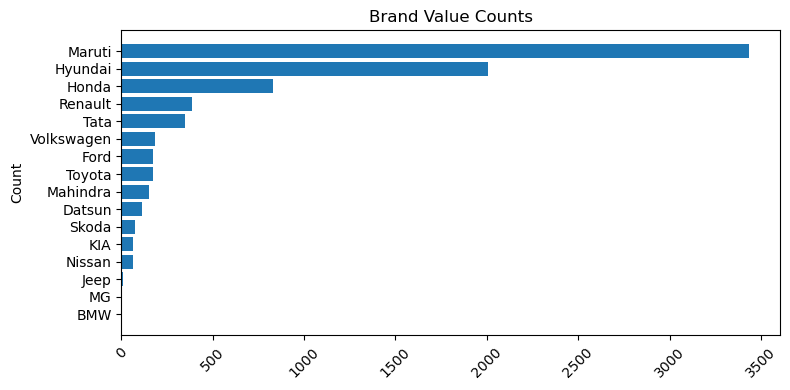

In [13]:
object_columns = df[["Fuel","Drive","Type","Brand"]]

for column in object_columns:
    value_counts = df[column].value_counts(ascending = True)
    plt.subplots(1, 1, figsize=(8, 4))
    plt.barh(value_counts.index, value_counts.values)
    plt.ylabel('Count')
    plt.title(f'{column} Value Counts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<AxesSubplot:>

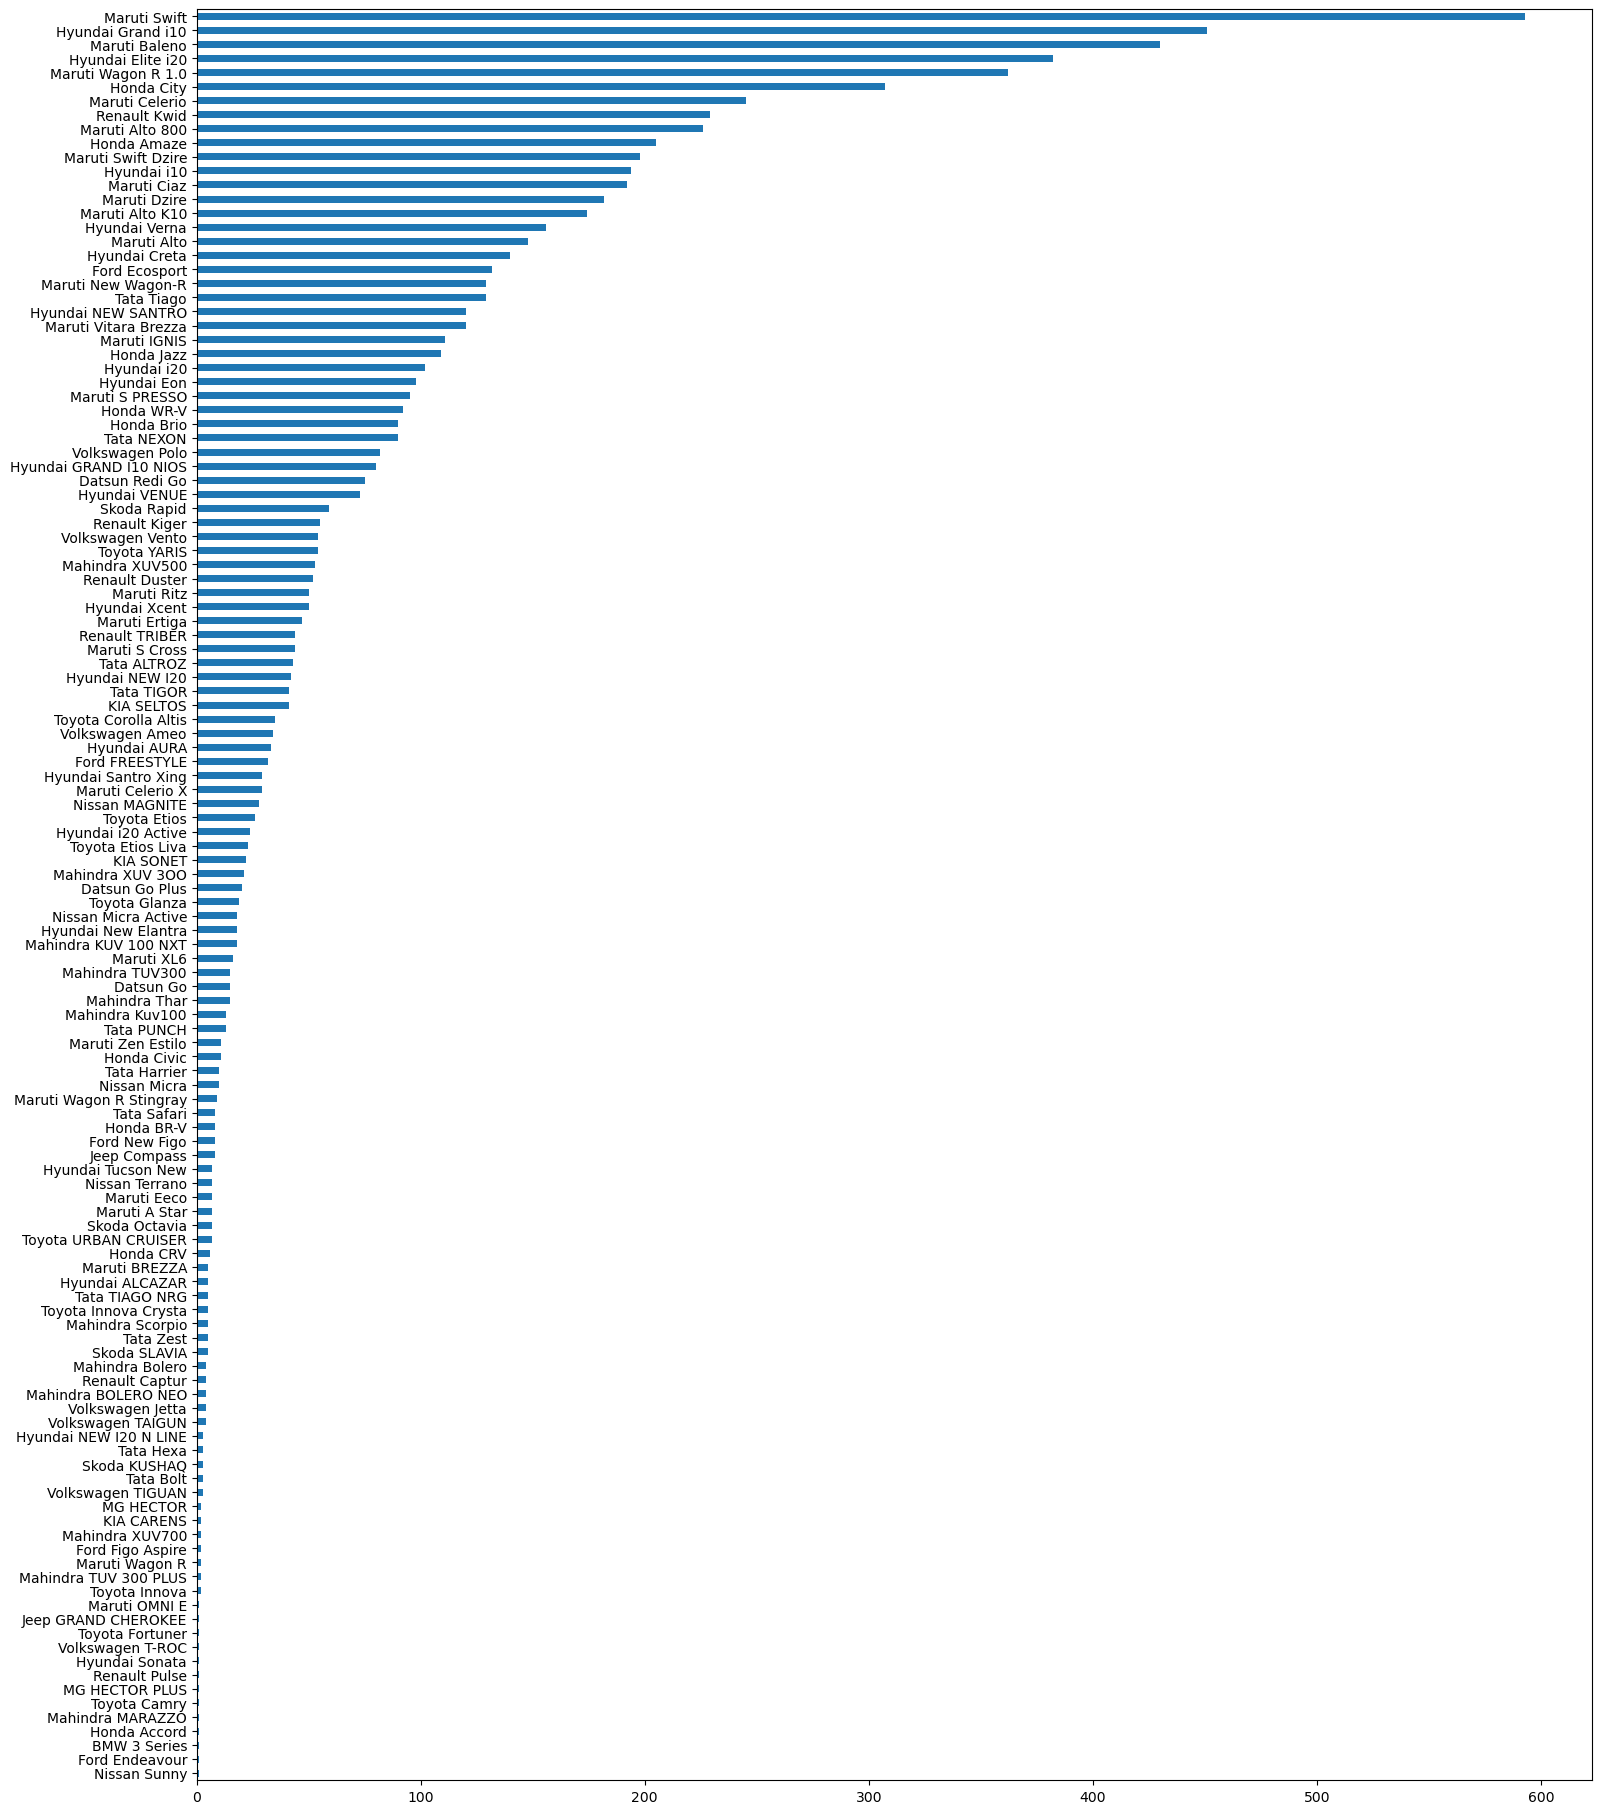

In [17]:
car_model_count = df["Car Name"].value_counts(ascending=True)
plt.figure(figsize=(18,23))
car_model_count.plot(kind="barh")

## Outliers Detection

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8014 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car Name  8014 non-null   object 
 1   Year      8014 non-null   float64
 2   Distance  8014 non-null   int64  
 3   Fuel      8014 non-null   object 
 4   Drive     8014 non-null   object 
 5   Type      8014 non-null   object 
 6   Price     8014 non-null   int64  
 7   Brand     8014 non-null   object 
 8   Model     8014 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 626.1+ KB


In [19]:
df.describe()

,Year,Distance,Price
count,8014.000000,8014.000000,8.014000e+03
mean,2016.995009,52626.256676,5.748328e+05
std,2.861454,29181.519800,2.650835e+05
min,2010.000000,0.000000,1.190000e+05
25%,2015.000000,30736.750000,3.930000e+05
50%,2017.000000,50369.500000,5.350000e+05
75%,2019.000000,71762.500000,6.980000e+05
max,2023.000000,971212.000000,3.300000e+06


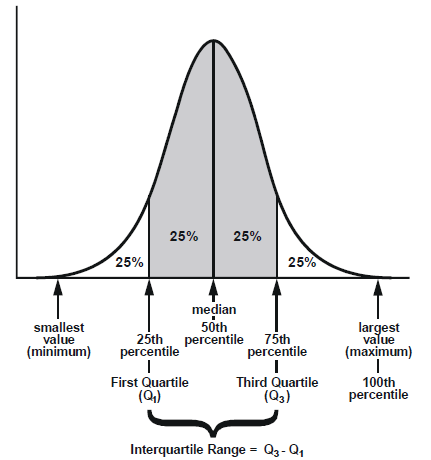

In [20]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
outliers.value_counts().sum()

250

* There are so many outliers and we have to keep that. It will be make sense

In [21]:
df.drop(["Car Name"], axis=1,inplace = True)

## Create Model

In [22]:
X = df.drop(columns="Price")
y = df["Price"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [25]:
ohe = OneHotEncoder()
ohe.fit(X[["Fuel","Drive","Type","Brand","Model"]])

OneHotEncoder()

In [26]:
ohe.categories_

[array(['CNG', 'DIESEL', 'LPG', 'PETROL'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['HatchBack', 'Lux_SUV', 'Lux_sedan', 'SUV', 'Sedan'], dtype=object),
 array(['BMW', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'KIA', 'MG',
        'Mahindra', 'Maruti', 'Nissan', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen'], dtype=object),
 array(['3 Series', 'A Star', 'ALCAZAR', 'ALTROZ', 'AURA', 'Accord',
        'Alto', 'Alto 800', 'Alto K10', 'Amaze', 'Ameo', 'BOLERO NEO',
        'BR-V', 'BREZZA', 'Baleno', 'Bolero', 'Bolt', 'Brio', 'CARENS',
        'CRV', 'Camry', 'Captur', 'Celerio', 'Celerio X', 'Ciaz', 'City',
        'Civic', 'Compass', 'Corolla Altis', 'Creta', 'Duster', 'Dzire',
        'Ecosport', 'Eeco', 'Elite i20', 'Endeavour', 'Eon', 'Ertiga',
        'Etios', 'Etios Liva', 'FREESTYLE', 'Figo Aspire', 'Fortuner',
        'GRAND CHEROKEE', 'GRAND I10 NIOS', 'Glanza', 'Go', 'Go Plus',
        'Grand i10', 'HECTOR', 'HECTOR PLUS', 'Harrier',

In [27]:
column_transformer = make_column_transformer((OneHotEncoder(categories=ohe.categories_),["Fuel","Drive","Type","Brand","Model"]),
                                             remainder = "passthrough")

In [28]:
lr = LinearRegression()

In [29]:
pipe = make_pipeline(column_transformer,lr)

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['CNG', 'DIESEL', 'LPG', 'PETROL'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['HatchBack', 'Lux_SUV', 'Lux_sedan', 'SUV', 'Sedan'], dtype=object),
                                                                            array(['BMW', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'J...
       'TRIBER', 'TUV 300 PLUS', 'TUV300', 'Terrano', 'Thar', 'Tiago',
       'Tucson New', 'URBAN CRUISER', 'VENUE', 'Vento', 'Verna',
       'Vitara Brezza', 'WR-V', 'Wagon R', 'Wagon R 1.0',
       'Wagon R Stingray', 'XL6', 'XUV 3OO', 'XUV500', 'XUV700', 'Xcent',
       'YARIS', 'Zen Estil

In [31]:
y_pred = pipe.predict(X_test)

In [32]:
r2_score(y_test,y_pred)

0.6860160644802304

# Select Best Parameter

In [37]:
scores = []
for i in range(1000):
    X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_transformer,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [38]:
print(np.argmax(scores))
print("Best random state")

552
Best random state


In [39]:
print(scores[np.argmax(scores)])
print("Best score")

0.7719178269338539
Best score


In [40]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_transformer,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7719178269338539

### Save Model

In [41]:
import pickle

In [42]:
pickle.dump(pipe,open("LinearRegressionModel.pkl","wb"))

In [45]:
df.to_csv("clean_df.csv")